In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import random
import shutil
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
base_dir = '/content/drive/MyDrive/capstone'
data_dir = '/content/drive/MyDrive/capstone/cocoa_diseases'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

In [4]:
folder_path = '/content/drive/MyDrive/capstone/cocoa_diseases/black_pod_rot'
item = os.listdir(folder_path)
count = len(item)

print(f"Jumlah isi dalam folder: {count}")

Jumlah isi dalam folder: 500


In [5]:
folder_path = '/content/drive/MyDrive/capstone/cocoa_diseases/pod_borer'
item = os.listdir(folder_path)
count = len(item)

print(f"Jumlah isi dalam folder: {count}")

Jumlah isi dalam folder: 208


In [6]:
folder_path = '/content/drive/MyDrive/capstone/cocoa_diseases/healthy'
item = os.listdir(folder_path)
count = len(item)

print(f"Jumlah isi dalam folder: {count}")

Jumlah isi dalam folder: 500


In [7]:
# Define the class names
class_names = ['black_pod_rot', 'healthy', 'pod_borer']

# Define the desired split ratios (adjust as needed)
train_ratio = 0.8  # 70% for training
test_ratio = 0.1   # 20% for testing
valid_ratio = 0.1  # 10% for validation

# Iterate over each class directory
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)
    total_images = len(images)

    # Split the images into train, test, and validation sets
    train_split = int(train_ratio * total_images)
    test_split = int((train_ratio + test_ratio) * total_images)

    train_images = images[:train_split]
    test_images = images[train_split:test_split]
    valid_images = images[test_split:]

    # Move images to respective directories
    for image in train_images:
        src_path = os.path.join(class_dir, image)
        dst_path = os.path.join(train_dir, class_name, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for image in test_images:
        src_path = os.path.join(class_dir, image)
        dst_path = os.path.join(test_dir, class_name, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

    for image in valid_images:
        src_path = os.path.join(class_dir, image)
        dst_path = os.path.join(validation_dir, class_name, image)
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        shutil.copy(src_path, dst_path)

print("Data splitting completed successfully!")

Data splitting completed successfully!


In [8]:
print(len(os.listdir(data_dir)))
print(len(os.listdir(train_dir)))
print(len(os.listdir(test_dir)))
print(len(os.listdir(validation_dir)))

3
3
3
3


In [9]:
# Function to count the number of files in a directory
def count_files(directory):
    count = sum([len(files) for r, d, files in os.walk(directory)])
    return count

# Count the number of files in each directory
data_count = count_files(data_dir)
train_count = count_files(train_dir)
test_count = count_files(test_dir)
valid_count = count_files(validation_dir)

# Print the results
print("Total data count:", data_count)
print("Train data count:", train_count)
print("Test data count:", test_count)
print("Validation data count:", valid_count)

Total data count: 1208
Train data count: 966
Test data count: 121
Validation data count: 121


In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

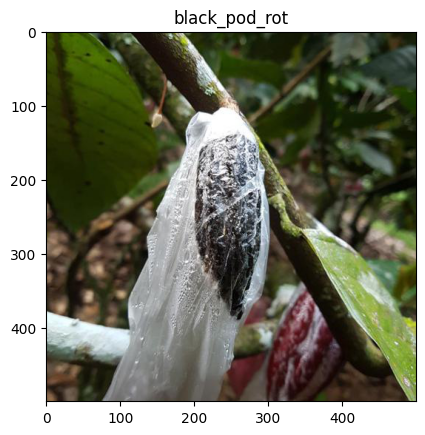

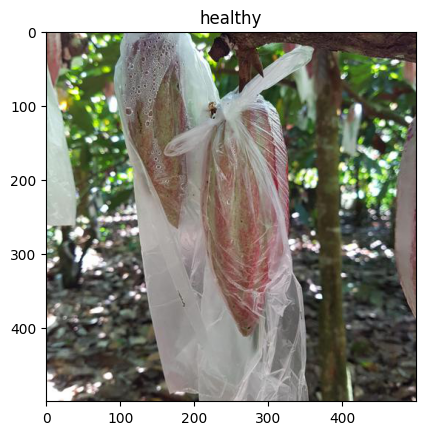

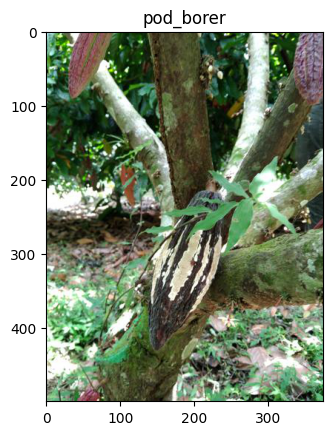

In [11]:
sample_images = 1

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        image_list = os.listdir(class_path)
        random.shuffle(image_list)  # Shuffle the list of images
        sample_list = image_list[:sample_images]  # Select a sample of images

        for image_name in sample_list:
            image_path = os.path.join(class_path, image_name)
            # Load and display the image
            image = Image.open(image_path)
            plt.imshow(image)
            plt.title(class_name)
            plt.show()

In [12]:
image_size = (250, 250)
batch_size = 20

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

Found 966 images belonging to 3 classes.
Found 121 images belonging to 3 classes.
Found 121 images belonging to 3 classes.


In [13]:
class_labels = train_generator.class_indices
print(class_labels)

{'black_pod_rot': 0, 'healthy': 1, 'pod_borer': 2}


In [14]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(250, 250, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 128)      0

In [18]:
epochs = 100
verbose = 1

checkpoint = ModelCheckpoint('highest_model.h5', monitor='accuracy', save_best_only=True, mode='max', verbose=verbose)

history = model.fit(
    train_generator,
    epochs=epochs,
    verbose = verbose,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)

Epoch 1/100
49/49 [==============================] - ETA: 0s - loss: 0.8842 - accuracy: 0.5549
Epoch 1: accuracy improved from -inf to 0.55487, saving model to highest_model.h5
49/49 [==============================] - 20s 416ms/step - loss: 0.8842 - accuracy: 0.5549 - val_loss: 0.8300 - val_accuracy: 0.6694
Epoch 2/100
49/49 [==============================] - ETA: 0s - loss: 0.8540 - accuracy: 0.5652
Epoch 2: accuracy improved from 0.55487 to 0.56522, saving model to highest_model.h5
49/49 [==============================] - 22s 437ms/step - loss: 0.8540 - accuracy: 0.5652 - val_loss: 0.8095 - val_accuracy: 0.6529
Epoch 3/100
49/49 [==============================] - ETA: 0s - loss: 0.8125 - accuracy: 0.6356
Epoch 3: accuracy improved from 0.56522 to 0.63561, saving model to highest_model.h5
49/49 [==============================] - 21s 424ms/step - loss: 0.8125 - accuracy: 0.6356 - val_loss: 0.9795 - val_accuracy: 0.5041
Epoch 4/100
49/49 [==============================] - ETA: 0s - loss

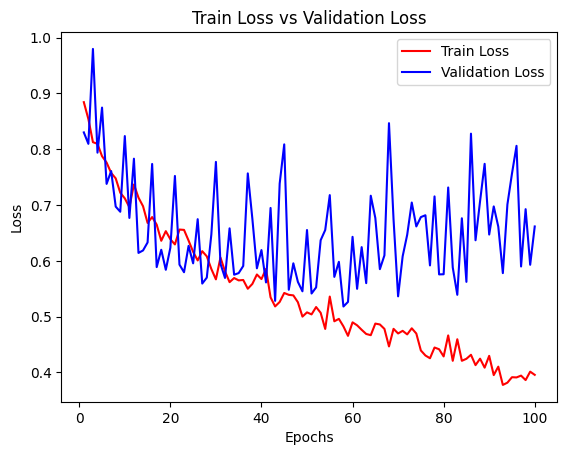

In [19]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot train loss dan validation loss
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

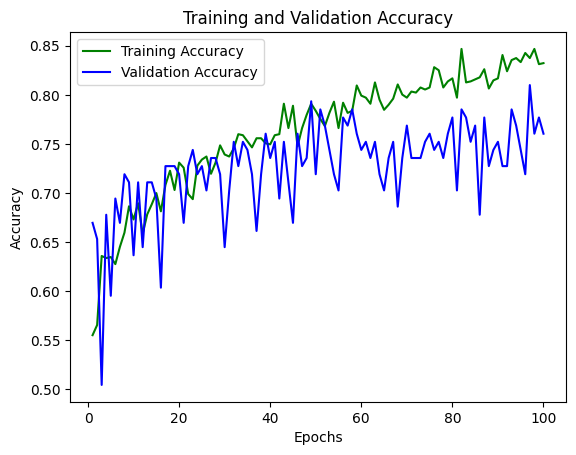

In [20]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
best_model = load_model('highest_model.h5')

# Fungsi untuk melakukan prediksi pada file gambar
def predict_image(file):
    img = image.load_img(file, target_size=(250, 250))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    prediction = best_model.predict(img)
    predicted_class_index = np.argmax(prediction)
    predicted_probability = np.max(prediction)
    
    probabilities = [round(float(p), 3) for p in prediction[0]]

    for i in range(len(class_names)):
        print("Prediction probability for {0}: {1}%".format(class_names[i], probabilities[i]*100))

    return class_names[predicted_class_index], predicted_probability

#file
uploaded_file = '/content/drive/MyDrive/capstone/test/pod_borer/pod_borer_12.jpg'

#prediksi pada file gambar
predicted_class, predicted_probability = predict_image(uploaded_file)

print("Prediction:", predicted_class)
print("Probability:", predicted_probability)

1/1 [==============================] - 0s 104ms/step
Prediction probability for black_pod_rot: 0.2%
Prediction probability for healthy: 5.7%
Prediction probability for pod_borer: 94.1%
Prediction: pod_borer
Probability: 0.9406971


In [40]:
# Evaluasi model
val_loss, val_acc = model.evaluate(validation_generator)
print('Validation Loss: ',val_loss),
print('Validation Accuracy: ',val_acc)

7/7 [==============================] - 1s 112ms/step - loss: 0.6615 - accuracy: 0.7603
Validation Loss:  0.661542534828186
Validation Accuracy:  0.7603305578231812
